# Statistical Analysis  

You are given a `csv` file, which include various data entries for each football match in **English Premier League** during the 2020-2021 season. To name a few of these entries: date, referee name, number of goals, red cards, etc. The `csv` dataset you are provided contains one row per football match. The column names are abbreviations and given as: 

In this exercise, you are asked to perform a number of operations to:

 - perform statistical analysis of the data, and

 - gain insights from the data.

```
Div = League Division
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HC = Home Team Corners
AC = Away Team Corners
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
```


In [ ]:
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
import arviz as az
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")

In [ ]:
module_url = f"https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

df = pd.read_csv('EPL_season-2021.csv')
df = df.fillna('')

Fetching https://raw.githubusercontent.com/oktaykarakus/cmt309-portfolio/main/EPL_season-2021.csv


In [ ]:
df.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,2,6,12,12,2,3,2,2,0,0
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,3,5,14,11,7,3,2,1,0,0
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,6,3,9,6,9,0,1,0,0,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,3,2,13,7,8,7,2,2,0,0
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1,7,12,9,2,5,1,1,0,0
5,E0,13/09/2020,16:30,Tottenham,Everton,0,1,A,0,0,...,5,4,15,7,5,3,1,0,0,0
6,E0,14/09/2020,20:15,Brighton,Chelsea,1,3,A,0,1,...,3,5,8,13,4,3,1,0,0,0
7,E0,14/09/2020,18:00,Sheffield United,Wolves,0,2,A,0,2,...,2,4,13,7,12,5,2,1,0,0
8,E0,19/09/2020,12:30,Everton,West Brom,5,2,H,2,1,...,7,4,9,11,11,1,1,0,0,1
9,E0,19/09/2020,15:00,Leeds,Fulham,4,3,H,2,1,...,7,6,13,18,5,3,1,2,0,0


## P2.1 - Data Pre-processing and Exploratory Analysis 

In this question, your task is to use `pandas` and other required modules to preprocess the data frame, `df`. Preprocessing will include: add/remove/recode columns in `df`. In addition, to further explore the dataset, you need to produce a number of exploratory plots. 

#### P2.1.1 - Add Booking Points Columns 

Sometimes, in order to better analyse any given data set, one can create a new type of feature by combining two or more existing entries of the data frame. In this question, you are asked to create a function `add_booking_pts(df)` which creates two new columns of: **Home booking points (HBP)**, and **Away booking points (ABP)** by using four existing columns of HY, AY, HR, and AR.

The details of the function `add_booking_pts(df)` are given below:

 - Takes the data frame `df` as input.
 
 - For each match, number of yellow cards is weighted with 10 points, whilst the number of red cards is with 25 points. 
 
 - Basically, the function calculates HBP and ABP columns as
    - $HBP = 10\cdot HY + 25\cdot HR$
    - $ABP = 10\cdot AY + 25\cdot AR$
 
 - These newly created arrays are added to `df`, whilst removing the columns for HY, AY, HR, and AR.
 
 - Finally, the updated `df` is returned.

In [ ]:
def add_booking_pts(df):
  """In this function HBP and ABP are created by using HY, AY, HR, AND AR columns..."""
  
  #creating new column for HBP using given formula. 
  df['HBP'] = 10 * df['HY'] + 25 * df['HR']
  #creating new column for HBP using given formula.
  df['ABP'] = 10 * df['AY'] + 25 * df['AR']
  
  #removing unnecessary columns.
  df.drop(columns=['HY', 'AY', 'HR', 'AR'], inplace = True, axis = 1)
  return df

add_booking_pts(df)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HS,AS,HST,AST,HF,AF,HC,AC,HBP,ABP
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,5,13,2,6,12,12,2,3,20,20
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,5,9,3,5,14,11,7,3,20,10
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,22,6,6,3,9,6,9,0,10,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,15,15,3,2,13,7,8,7,20,20
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,7,13,1,7,12,9,2,5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,19,5,5,4,10,8,14,1,20,20
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,21,8,11,3,8,10,7,5,20,20
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,12,10,3,3,11,1,8,9,30,10
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,14,17,7,5,5,9,2,3,0,30


#### P2.1.2 - Convert Table Colums into Digits  

When reading in the dataframe, one can see that it contains some textual data which will not be relevant for the numerical analyses in Question 1. Therefore, implement a function `convert_results(df)` 

1. (1 mark) to convert **half-time results (HTR)** and **full-time results (FTR)** into numerical data. The details of the function are given below: 
 
- HTR and FTR columns include string values of `'H'`, `'D'` and `'A'`. These string corresponds to the cases below:
    - `'H'`: Home team win

    - `'D'`: Draw

    - `'A'`: Away team win

- The function `convert_results(df)` will replace `'H'`, `'D'` and `'A'` values with `int` type values of of 1, 0, -1, respectively.

2. (1 mark) to convert **Time** column into `float` type values in interval of $[0, 24)$. Since an hour has 60 minutes, a 15-minute interval corresponds to quarter of an hour (i.e 0.25 hours). Considering this, some examples can be given:
 
- `'12.30'` will be `12.5`, or 
 
- `'18.15'` will be `18.25` or 
 
- `'17.00'` will be `17.0`
 
The function `convert_results(df)` should return the updated data frame `df`.

In [ ]:
def convert_results(df):
   """This function will change HTR and FTR results into numberical vaules and
   time will change into float with 15minute interval to quarter of an hour..."""
  
   #updating HTR string values with numerical values.
   df['HTR'] = df['HTR'].map({'H': 1, 'D': 0, 'A': -1})
   #updating FTR string values with numerical values.
   df['FTR'] = df['FTR'].map({'H': 1, 'D': 0, 'A': -1})

   #change time column with new time interval with float value.
   df['Time'] = pd.to_timedelta('00:'+df["Time"]).dt.total_seconds()/60
   return df
convert_results(df)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HS,AS,HST,AST,HF,AF,HC,AC,HBP,ABP
0,E0,12/09/2020,12.5,Fulham,Arsenal,0,3,-1,0,1,...,5,13,2,6,12,12,2,3,20,20
1,E0,12/09/2020,15.0,Crystal Palace,Southampton,1,0,1,1,0,...,5,9,3,5,14,11,7,3,20,10
2,E0,12/09/2020,17.5,Liverpool,Leeds,4,3,1,3,2,...,22,6,6,3,9,6,9,0,10,0
3,E0,12/09/2020,20.0,West Ham,Newcastle,0,2,-1,0,0,...,15,15,3,2,13,7,8,7,20,20
4,E0,13/09/2020,14.0,West Brom,Leicester,0,3,-1,0,0,...,7,13,1,7,12,9,2,5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16.0,Liverpool,Crystal Palace,2,0,1,1,0,...,19,5,5,4,10,8,14,1,20,20
376,E0,23/05/2021,16.0,Man City,Everton,5,0,1,2,0,...,21,8,11,3,8,10,7,5,20,20
377,E0,23/05/2021,16.0,Sheffield United,Burnley,1,0,1,1,0,...,12,10,3,3,11,1,8,9,30,10
378,E0,23/05/2021,16.0,West Ham,Southampton,3,0,1,2,0,...,14,17,7,5,5,9,2,3,0,30


In [ ]:
df['Time'].head()

0    12.5
1    15.0
2    17.5
3    20.0
4    14.0
Name: Time, dtype: float64

#### P2.1.3 - Fair Play League Table

Write a function `create_fair_play_table(df)` to depict a **barplot with horizontal bars** representing *total booking points*. The module `seaborn` and its corresponding methods and attributes must be used in this question.

Produce a bar for each team (use the HBP and ABP columns) and plot them in increasing order. The team with the top bar (*i.e.* lowest HBP+ABP) will represent the Fair Play League Champion. Also, print the statement below

```
The champions of the 2020-2021 Fair Play League is {locate the team here}.
```

![](https://drive.google.com/uc?export=view&id=11gYwhu-1D6dxEcmXK31pL5Zcop497w9i)

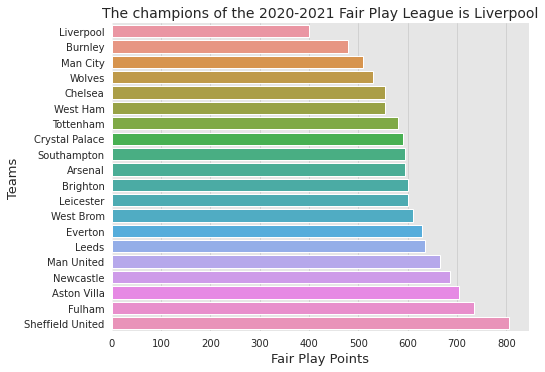

In [ ]:
def create_fair_play_table(df):
  """This function creates barplot for fair play performance by all teams using all HBP and ABP point.
  Basically adding all points and gives final data and then it returns main barplot..."""
  
  #ht is home team with all point sum.
  ht = df.groupby('HomeTeam')['HBP'].sum().reset_index()
 
  #at is away team with all point sum.
  at = df.groupby('AwayTeam')['ABP'].sum().reset_index()
  
  #renaming both data columns.
  ht.columns = ['TEAMNAME', 'POINTS']
  at.columns = ['TEAMNAME', 'POINTS']
  
  #merging ht and at to create one data.
  fp = pd.concat([ht,at], ignore_index = True)

  #creating newdata by taking all teamname and point sum and sorted using points query in ascending order.
  df_fp = fp.groupby('TEAMNAME')['POINTS'].sum().reset_index().sort_values('POINTS', ascending = True)
  #print(df_fp)
  
  #setting colour code for barplot.
  sns.set_color_codes("pastel")
  
  #creating barplots with all details.
  sns.catplot(data = df_fp, x ='POINTS',  y ='TEAMNAME',kind = 'bar',height = 5, aspect = 1.5)
  
  #x-axis title.
  plt.xlabel("Fair Play Points", size=13)
  
  #y-axis title.
  plt.ylabel("Teams", size=13)
  
  #main title. (created title for plot instead of adding new line for champions because it looks more attractive.)
  plt.title("The champions of the 2020-2021 Fair Play League is {}".format(df_fp.TEAMNAME[10]), size = 14)
  
  return df_fp

df_fp = create_fair_play_table(df)

### P2.1.4 - Expected number of goals vs. Exact scores 

Expected number of goals (xG) is a predictive model used to assess every goal-scoring chance, and the likelihood of scoring. Nowadays, xG has a strong algorithm behind it, but in this example, we will assume two basic models to calculate the xG of any football team for any game:
 
 - $xG_1 = 0.1 \cdot S$
 
 - $xG_2 = 0.1 \cdot S + 0.05\cdot SoT$

where $S$ and $SoT$ is the total number of shoots and total shoots on target, respectively.

Write a function `xG_plot(df)` to plot $xG_1$, $xG_2$ and exact number of goals scored by a randomly selected football team for whole 38 game weeks. 

This exploratory analysis will depict two sub-plots:
 
 1. Running mean of all three variables (xG1, xG2 and Goals). Running mean shows the average of a value up to a time step. For example: running mean of xG1 for week 5 is $\frac{1}{5}\sum_{i=0}^{4}xG1_{i}$, or similarly for week 17 is $\frac{1}{17}\sum_{i=0}^{16}xG1_{i}$.

 2. Cumulative sum of all three variables (xG1, xG2 and Goals). (Hint: `np.cumsum()`)

Use different colours, line styles, legends, etc. to make the exploratory analysis more understandable. The function also returns calculated xGs for the randomly selected team in a `dict` type object of form `{team : (xG1, xG2)}`

![](https://drive.google.com/uc?export=view&id=1Y3uSzRQaKumgoKoNdkohYBhpgBrOkYeO)

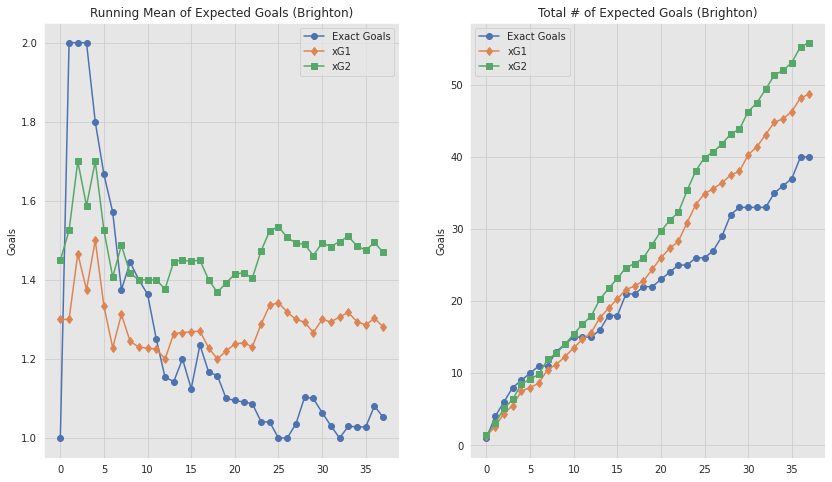

In [ ]:
def xG_plot(df):
  """Function creates random selection of team and then using formulas such as total shoots(S) and 
  total shoots on target(SoT) creates new dictionary. Then creates 2graphs for running mean of expected goals
  and total goals"""
  
  #ramdom selection of team.
  team =df['HomeTeam'].drop_duplicates().sample().values[0]
  
  #taking all teams from home and away
  home = df[df["HomeTeam"] == team]
  away = df[df["AwayTeam"] == team]
 
  #creating new data for total shoots and then adding them.
  hs = home['HS']
  aws = away['AS']
  S = hs.append(aws).sort_index()

  #creating new data for total shoots on target and then adding them.
  hst = home['HST']
  ast = away['AST']
  SoT = hst.append(ast).sort_index()
  
  #creating new data for exact goals and adding them.
  ht = home['FTHG']
  at = away['FTAG']
  exctgoals = ht.append(at).sort_index()
  
  #xG1 and xG2 formulas.
  xG1 = 0.1*S
  xG2 = 0.1*S  + 0.05*SoT
 
  #converting all data into dictonary 
  datadict = {"xG1": xG1, "xG2": xG2, "EXACTGOALS": exctgoals}
  
  #converting back into dataframe
  data = pd.concat(datadict, axis = 1)
 
  #creating new columns for running mean.
  data['GOALS'] = data['EXACTGOALS'].expanding().mean()
  data['xG1_rm'] = data['xG1'].expanding().mean()
  data['xG2_rm'] = data['xG2'].expanding().mean()
  data.reset_index(level=0,inplace=True)
  data
  
  #selecting figure sizes
  plt.figure(figsize=(14,8)) 
  
  #FIGURE-1:
  plt.subplot(1, 2, 1)
  
  #ploting graph for running mean of expected goals for random team with all titles and labels.
  plt.title(f'Running Mean of Expected Goals ({team})')
  plt.ylabel('Goals')
 
  #all line plots with specific markers for data points.
  plt.plot(data['GOALS'], label="Exact Goals",marker="o")
  plt.plot(data['xG1_rm'], label="xG1", marker='d')
  plt.plot(data['xG2_rm'], label="xG2", marker='s')
  plt.legend()
  
  #FIGURE-1:
  plt.subplot(1, 2, 2)
  
  #ploting graph for total of expected goals for random team with all titles and labels.
  plt.title(f'Total # of Expected Goals ({team})')
  plt.ylabel('Goals')
  
  #all line plots with specific markers for data points.
  plt.plot(data['EXACTGOALS'].cumsum(), label="Exact Goals",marker="o")
  plt.plot(data['xG1'].cumsum(), label="xG1", marker='d')
  plt.plot(data['xG2'].cumsum(), label="xG2", marker='s')
  plt.legend()
  
  #showing both plots.
  plt.show()

  return {team: (data['xG1'], data['xG2'])} #{team : (xG1, xG2)} # just for an example. your result might differ from this definition.

xG = xG_plot(df)

## P2.2 - Statistical Analysis 

#### P2.2.1 - Variable Selection for Linear Regression

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a dictionary of variables. For this analysis, firstly, either all Home or Away teams will be marked and the predictors given below will be used

  - Home: [Time, FTR, HTHG, HTR, HS, HST, HF, HC, HBP]
  
  - Away: [Time, FTR, HTAG, HTR, AS, AST, AF, AC, ABP]. 
 
 - `main_target` is the variable for the regression, Home: FTHG (or Away: FTAG)
 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is the dictionary which stores the selected subset of initial `main_pred` both for home and away teams, in a format of `main_pred = {'Home': [... selected predictors here ...], 'Away': [... selected predictors here ...]}`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - Stage 1 (adding predictors): you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - Stage 2 (removing non-significant predictors): if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [ ]:
def select_variable(df, main_pred, main_target, alpha):
    # # HTHG yields the best (highest) r-squared: 0.5330945005155027
    # # Using all columns gives greater R-squared (0.754) and therefore is better than HTHG alone
    return_dict = {}
    for team in ["Home", "Away"]:
        # Stage 1 Begin
        selected_variables = list()
        current_max_r_squared_adj = 0
        main_pred_rem = main_pred[team]
        for _ in main_pred[team]:
            l_rsq = list()
            for a in main_pred_rem:
                if not selected_variables:
                    formula = main_target[team] + ' ~ ' + a
                else:
                    formula = main_target[team] + ' ~ ' + a + \
                        '+' + '+'.join(selected_variables)
                # print("Formula:" + formula + " Selected Vars: " +
                #       str(selected_variables))
                l_rsq.append((a, sm.OLS.from_formula(
                    formula, df).fit().rsquared_adj))

            l_rsq = sorted(l_rsq, key=lambda tup: tup[1], reverse=True)
            # print(l_rsq)
            # print("Highest Val:" + str(l_rsq[0]))
            if l_rsq[0][1] > current_max_r_squared_adj:
                current_max_r_squared_adj = l_rsq[0][1]
                selected_variables.append(l_rsq[0][0])
                main_pred_rem = [
                    i for i in main_pred_rem if i not in selected_variables]
                # print("Selected " + l_rsq[0][0])
            else:
                # print("Rejected " + l_rsq[0][0])
                main_pred_rem = [
                    i for i in main_pred_rem if i not in [l_rsq[0][0]]]
            # print("Remaining Variable: " + str(main_pred_rem))

        # print("Selected Vars: " + str(selected_variables))
        # print("Max adjusted R\u00b2 is {}".format(current_max_r_squared_adj))
        # Stage 1 End

        # Stage 2 Begin
        formula = main_target[team] + ' ~ ' + a + \
            '+' + '+'.join(selected_variables)
        fit = sm.OLS.from_formula(formula, df).fit()
        # print(fit.summary())
        # for attr in dir(fit):
        #     if not attr.startswith('_'):
        #         print(attr)
        selected_variables_rem = selected_variables
        for _ in selected_variables_rem:
            formula = main_target[team] + ' ~ ' + '+'.join(selected_variables_rem)
            # print("Formula = " + formula)
            fit = sm.OLS.from_formula(formula, df).fit()
            variable_to_remove = ""
            # print(fit.summary())
            # print("MAX="+str(fit.pvalues.max()))
            if fit.pvalues.idxmax() == "Intercept":
                break
            elif fit.pvalues.max() > alpha:
                variable_to_remove = fit.pvalues.idxmax()
            #     print("variable_to_remove: "+str(variable_to_remove))
            # else:
            #     print("No variables to remove")
            #     print("Selected Variables: " + str(selected_variables_rem))

            selected_variables_rem = [
                i for i in selected_variables_rem if i not in [variable_to_remove]]
            # if (variable_to_remove == ""):
            #     # print("No variables to remove")
            #     # print("Selected Variables: " + str(selected_variables_rem))
            # else:
            #     # print("Loop continues with variable - " +
            #     #     str(selected_variables_rem))

        formula = main_target[team] + ' ~ ' + '+'.join(selected_variables_rem)
        fit = sm.OLS.from_formula(formula, df).fit()
        # print(fit.summary())
        # Stage 2 End
        return_dict[team] = selected_variables_rem


    return return_dict


# team = "Home"
main_pred = {"Home": ['Time', 'FTR', 'HTHG', 'HTR', 'HS', 'HST', 'HF', 'HC', 'HBP'],
             "Away": ['Time', 'FTR', 'HTAG', 'HTR', 'AS', 'AST', 'AF', 'AC', 'ABP']}
main_target = {"Home": "FTHG", "Away": "FTAG"}
# if team == "Home":


select_variable(df, main_pred, main_target, 0.05)

{'Home': ['HTHG', 'HST', 'FTR', 'HTR', 'HC'],
 'Away': ['HTAG', 'FTR', 'AST', 'HTR']}

#### P2.2.2 - Maximum likelihood estimation (MLE) and prediction

In this question, you are expected to solve a regression problem, but this time using **maximum likelihood estimation (MLE)** theory. You need to construct a regression analysis to investigate how well the **full time results (FTR)** can be predicted from the other variables of FTHG, HS, HC, AS, AC. 

#### P2.2.2.1 - ML Estimate of regression parameters 

Create a function `ML_estimate(df_est, pred, target)` which calculates the ordinary least squares (OLS) and two MLE fits (Poisson and Probit) for the given arguments.

You need to use `statsmodels` module and its corresponding methods of `.OLS()`, `.Poisson()` and `.Probit()`.

- `df_est` is a subset of the data frame `df` which includes **randomly selected** 280 rows of `df`. The remaining 100 rows will be used in prediction application (see below).

- `pred` is a list of variables. For this analysis, OLS and other models utilise the predictors of FTHG, HS, HC, AS, AC. (Note: Depending on your implementation, you might need to add a constant to the predictors. Please see the lecture notes)

- `target` is the target variable for the regression, FTR. You need to adjust values of this column for the purpose of this question. 
 
  - FTR = 1.0 if Home team wins.
  
  - FTR = 0.0 if Away team wins or a Draw.

The function should return variables 

 - `MLE_model_fits` a `tuple` object which stores all three model fits `statsmodels` objects for OLS, Probit and Poisson.

In [ ]:
#creating new data.
df2 = df.loc[:, ['FTR', 'FTHG','HS','HC','AS','AC']]

#replacing all FTR int values to float.
df2.FTR = df2.FTR.replace({ 1: 1.0, 0: 0.0, -1: 0.0 })

#if any null value is there then the following code removes it.
df_mle = df2.astype('float64').dropna()

# Creating new data for training
df_est = df_mle.loc[:, ['FTR', 'FTHG','HS','HC','AS','AC']].dropna()

# Setting Traning and Test samples.
row, col = df_est.shape

#selecting random choice of rows.
test_id = np.random.choice(row, 100, replace = False)

#train all test data.
training_id = np.setdiff1d(np.arange(row), test_id, assume_unique=True)

#adding constant in data.
df_est['const'] = 1

#all predictors in list. 
pred = df_est.iloc[training_id][['FTHG','HS','HC','AS','AC','const']].dropna()

#selecting a target variable.
target = df_est.iloc[training_id]['FTR'].dropna()

In [ ]:
def ML_estimate(df_est, pred, target):
  """This function calculate the OLS, Poisson, and probit values..."""
 
  #ols values using statsmodels module.
  ols = sm.OLS(target, pred).fit()
 
  #poisson values using statsmodels module.
  poisson = sm.Poisson(target, pred).fit()
 
  #probit values using statsmodels module.
  probit = sm.Probit(target, pred).fit()
  
  #storing all values in mle model fits.
  MLE_model_fits = (ols, poisson, probit)
  
  return MLE_model_fits

MLE_model_fits = ML_estimate(df_est, pred, target)

Optimization terminated successfully.
         Current function value: 0.640051
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377025
         Iterations 7


#### P2.2.2.2 - Predicting Home Win via MLE 

Create a function `ML_predict(df_pred, MLE_model_fits)` which calculates FTR predictions for all three models of OLS, Probit and Poisson.

You need to use `statsmodels`' method for prediction: `.predict()`.

- `df_pred` is a subset of the data frame `df` which includes only a subset of 100 rows of `df`.

- `MLE_model_fits` is a `tuple` object obtained from the `ML_estimate()` function above. Unpack this argument to obtain `statsmodels` objects for all three models. 

This function should return: 

 - `df_pred`

 - `MLE_model_predictions` is a `tuple` which stores the predicted outputs for each three models.  

In [ ]:
#subset of df_est which includes random choice of rows,
df_pred = df_est.iloc[test_id][['FTHG','HS','HC','AS','AC','const']].dropna()

In [ ]:
def ML_predict(df_pred, MLE_model_fits):
  """This function calculates all the prediction for OLS,
  Poisson and Probit..."""
  
  #taking all values from previous function.
  (ols, poisson, probit) = MLE_model_fits
  
  #predcting Ols value.   
  pred_ols = ols.predict(df_pred)
  
  #predcting poisson value.  
  pred_poisson = probit.predict(df_pred)
  
  #predcting probit value.  
  pred_probit = poisson.predict(df_pred)
  
  #storing all values in mle model prediction. 
  MLE_model_predictions=(pred_ols,pred_poisson, pred_probit)
    
  return MLE_model_predictions

MLE_model_predictions = ML_predict(df_pred, MLE_model_fits)

MLE_model_predictions

(206    0.646484
 10     0.230193
 209   -0.055021
 236    0.324357
 306    0.305050
          ...   
 184    0.604628
 328    0.158493
 123    0.576985
 32     0.051037
 136    0.882473
 Length: 100, dtype: float64, 206    0.805657
 10     0.137501
 209    0.005627
 236    0.262896
 306    0.234718
          ...   
 184    0.727404
 328    0.084114
 123    0.697854
 32     0.024703
 136    0.967246
 Length: 100, dtype: float64, 206    0.559069
 10     0.206684
 209    0.113405
 236    0.263490
 306    0.256949
          ...   
 184    0.496243
 328    0.156535
 123    0.454154
 32     0.156732
 136    0.893399
 Length: 100, dtype: float64)

#### P2.2.3 - Evaluating Prediction Performance

You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy, and mean square error (MSE) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - $N = 100$ samples of predictions from each model, stored in `MLE_model_predictions`.
 
 - The ground-truth FTR values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$ and its average is $\bar{P}$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - FTR_i)^2$$

In order to obtain the prediction accuracy for each model, you first should convert continuous prediction results into the binary form (either 1.0 or 0.0). The binarisation process will follow the piecewise function below:

  $$P_{binary, i} = \begin{cases} 1.0, & P_i \geq \bar{P}\\ 0.0, & \text{otherwise}  \end{cases} \quad \text{where} \quad i = 0, 1, \dots, 99$$

Then the percentage accuracy, $Acc\%$ is calculated as

$$ Acc\% = 100 - \sum_{i=0}^{99} |P_{binary, i} - FTR_i|$$

Following these, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | OLS         |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | MLE-Probit  |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | MLE-Poisson |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, using `sklearn` method `RocCurveDisplay()`, the `prediction_perf()` function should 

 - `print` and `return` the data frame `df_results`.

**Marking for this question**
 - (2 marks) Calculating MSE and $Acc\%$ metrics correctly.
 - (3 marks) Creating and returning dataframe `df_results`.
 
with a condition that all these three operations are performed in a **fully working `prediction_perf()` function**.

In [ ]:
#ground truth which include de_est and random choice of row(gt is ture value).
gt = df_est.FTR.iloc[test_id]

In [ ]:
def prediction_perf(gt, MLE_model_predictions):
  """This function gives all the prediction performance of models, accuracy 
  and MSE..."""
  
  #taking all values from previous function.
  (pred_ols,pred_poisson, pred_probit) = MLE_model_predictions

  #calculating mean square error for all three values.  
  MSE_ols = np.round(np.mean((pred_ols - gt)**2), 4)
  MSE_poisson = np.round(np.mean((pred_poisson - gt)**2), 4)
  MSE_probit = np.round(np.mean((pred_probit - gt)**2), 4)
    
  #calculating hard thresholds for all three values.
  pred_ols2 = (pred_ols >= np.mean(pred_ols)).astype("int")
  pred_poisson2 = (pred_poisson >= np.mean(pred_poisson)).astype("int")
  pred_probit2 = (pred_probit >= np.mean(pred_probit)).astype("int")
    
  #calculating accuracy for all three values
  acc_ols = np.round(100*accuracy_score(y_true=gt, y_pred=pred_ols2), 2)
  acc_poisson = np.round(100*accuracy_score(y_true=gt, y_pred=pred_poisson2), 2)
  acc_probit = np.round(100*accuracy_score(y_true=gt, y_pred=pred_probit2), 2)
    
  #falsepositverate and truepositiverate roc_curve values.
  fpr1, tpr1, thresholds1 = roc_curve(gt, pred_ols)
  fpr2, tpr2, thresholds2 = roc_curve(gt, pred_poisson)
  fpr3, tpr3, thresholds3 = roc_curve(gt, pred_probit)

  #area under curve values using fpr and tpr.
  auc_ols = auc(fpr1, tpr1)
  auc_poisson = auc(fpr2, tpr2)
  auc_probit = auc(fpr3, tpr3)

  # ALL ROC CURVE PLOTS. 
  #display1 = RocCurveDisplay(fpr = fpr1, tpr = tpr1, roc_auc = auc_ols)
  #display1.plot()
  #display2 = RocCurveDisplay(fpr = fpr2, tpr = tpr2, roc_auc = auc_poisson)
  #display2.plot()
  #display3 = RocCurveDisplay(fpr = fpr3, tpr = tpr3, roc_auc = auc_probit)
  #display3.plot()
  #plt.show()
    
  #creating dictionary to store all values.
  results = {'Model':['OLS', 'MLE-Probit', 'MLE-Poisson'], 'Acc%':[acc_ols, acc_probit, acc_poisson],
             'MSE':[MSE_ols, MSE_probit, MSE_poisson],'AUC':[auc_ols, auc_probit, auc_poisson]}
  
  #converting dictonary in data frame.  
  df_results = pd.DataFrame(results)
  
  return df_results

df_results = prediction_perf(gt, MLE_model_predictions)
df_results

,Model,Acc%,MSE,AUC
0,OLS,85.0,0.1192,0.951823
1,MLE-Probit,83.0,1.3809,0.942274
2,MLE-Poisson,87.0,0.0840,0.952257
